In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('datasets/final_new_dataset-elevated-6.csv')

/var/folders/gc/4ygszpsn22j82rth80b9m9kc0000gn/T/ipykernel_2899/4207659975.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        4000 non-null   object 
 1   P. gingivalis   4000 non-null   int64  
 2   F. nucleatum    4000 non-null   int64  
 3   IL-1β           4000 non-null   float64
 4   IL-6            4000 non-null   float64
 5   IL-10           4000 non-null   float64
 6   MMP-8           4000 non-null   float64
 7   Urea            4000 non-null   float64
 8   Uric Acid       4000 non-null   float64
 9   Glutathione     4000 non-null   float64
 10  Nitric Oxide    4000 non-null   float64
 11  Vitamin C       4000 non-null   float64
 12  Sodium (Na+)    4000 non-null   float64
 13  Potassium (K+)  4000 non-null   float64
 14  pH              4000 non-null   float64
 15  Smoking         4000 non-null   int64  
 16  Gender          4000 non-null   object 
dtypes: float64(12), int64(3), object(

In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
print(data[['Gender']].head())

   Gender
0       0
1       1
2       0
3       1
4       1


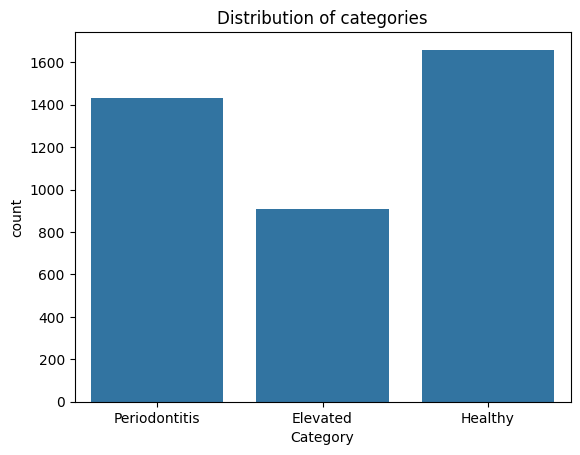

In [4]:
plt.figure()
sns.countplot(x='Category', data=data)
plt.title('Distribution of categories')
plt.show()

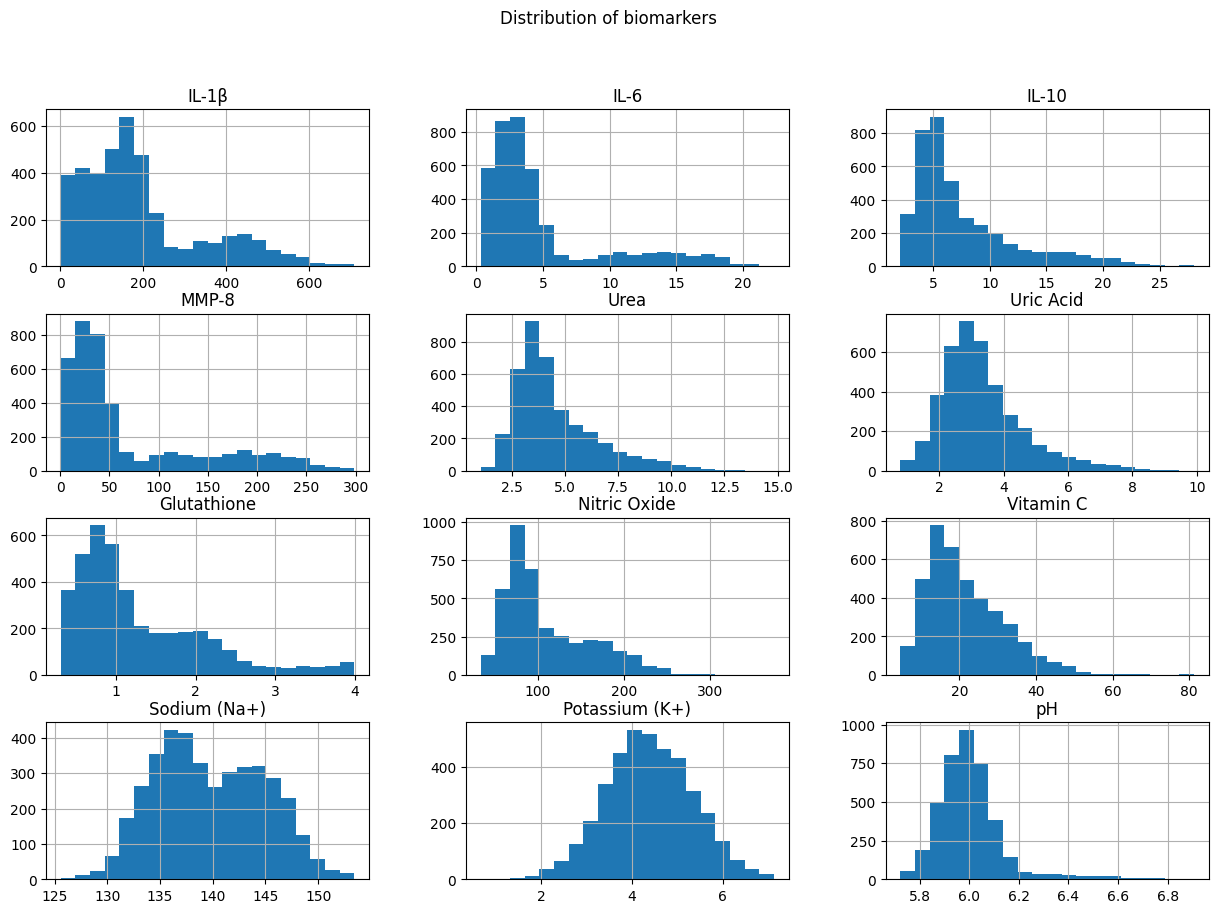

In [5]:
cols = data.select_dtypes(include=['float64']).columns
data[cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of biomarkers")
plt.show()
                          

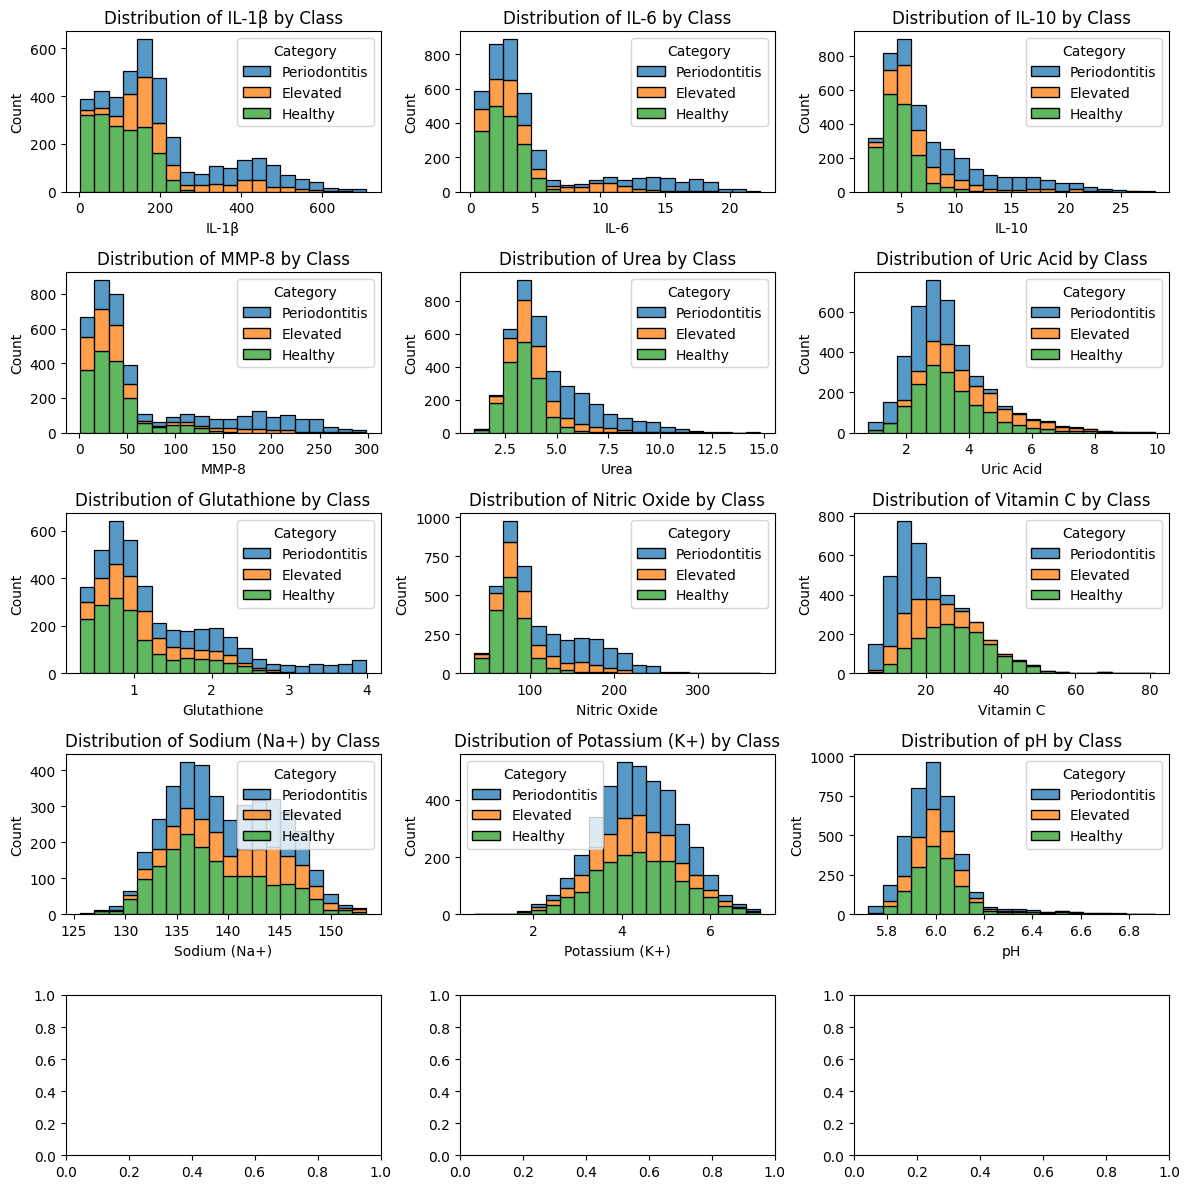

In [6]:
# Select only numerical features
cols = data.select_dtypes(include=['float64']).columns

# Set up the figure
fig, axes = plt.subplots(nrows=len(cols)//3+1, ncols=3, figsize=(12, 12))
axes = axes.flatten()

# Loop through each feature and plot
for i, col in enumerate(cols):
    sns.histplot(data, x=col, hue='Category', multiple="stack", bins=20, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} by Class")

plt.tight_layout()
plt.show()

Corr matrix
                P. gingivalis  F. nucleatum     IL-1β      IL-6     IL-10  \
P. gingivalis        1.000000      0.227593  0.314957  0.276987  0.299417   
F. nucleatum         0.227593      1.000000  0.303918  0.253626  0.274917   
IL-1β                0.314957      0.303918  1.000000  0.537454  0.570311   
IL-6                 0.276987      0.253626  0.537454  1.000000  0.545826   
IL-10                0.299417      0.274917  0.570311  0.545826  1.000000   
MMP-8                0.300109      0.255822  0.522383  0.608221  0.581958   
Urea                 0.313845      0.267857  0.421801  0.475963  0.506452   
Uric Acid           -0.111004     -0.047408 -0.013070 -0.077604 -0.122107   
Glutathione          0.195410      0.162840  0.371251  0.343772  0.375341   
Nitric Oxide         0.331560      0.284876  0.467956  0.467769  0.492492   
Vitamin C           -0.305151     -0.270353 -0.392533 -0.337217 -0.414895   
Sodium (Na+)         0.073354      0.057377  0.184327  0.088558 

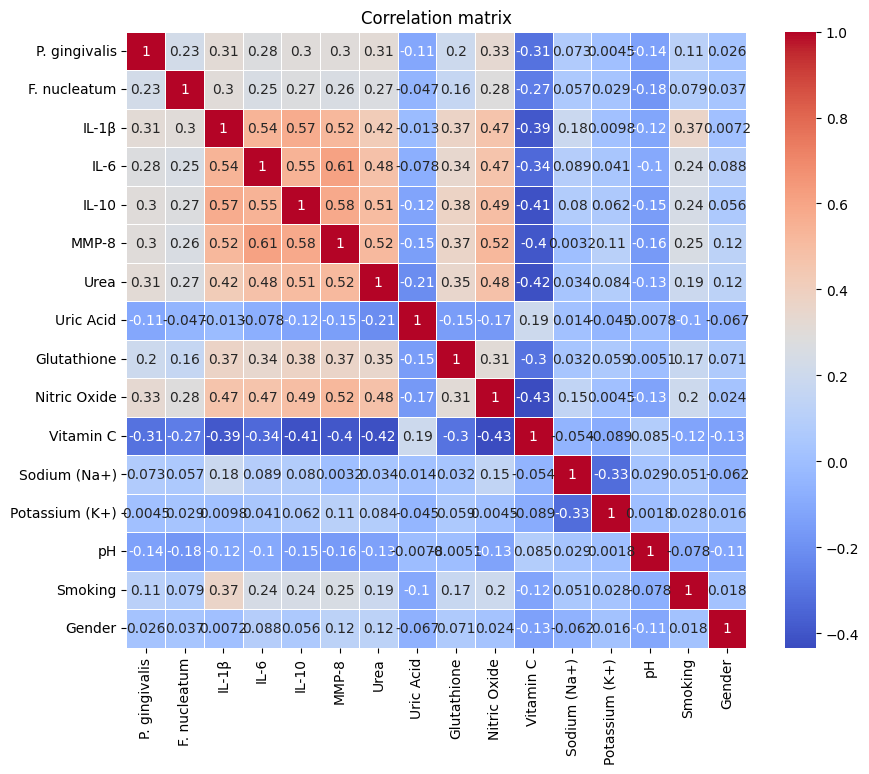

In [7]:
num_data = data.select_dtypes(include=[np.number])
corr_matrix = num_data.corr()
print("Corr matrix")
print(corr_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

Feature: Smoking
Smoking
0    0.8695
1    0.1305
Name: proportion, dtype: float64

Feature: P. gingivalis
P. gingivalis
1    0.50225
0    0.49775
Name: proportion, dtype: float64

Feature: F. nucleatum
F. nucleatum
0    0.57925
1    0.42075
Name: proportion, dtype: float64



/var/folders/gc/4ygszpsn22j82rth80b9m9kc0000gn/T/ipykernel_2899/2345188054.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='coolwarm')
/var/folders/gc/4ygszpsn22j82rth80b9m9kc0000gn/T/ipykernel_2899/2345188054.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='coolwarm')
/var/folders/gc/4ygszpsn22j82rth80b9m9kc0000gn/T/ipykernel_2899/2345188054.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='coolwarm')


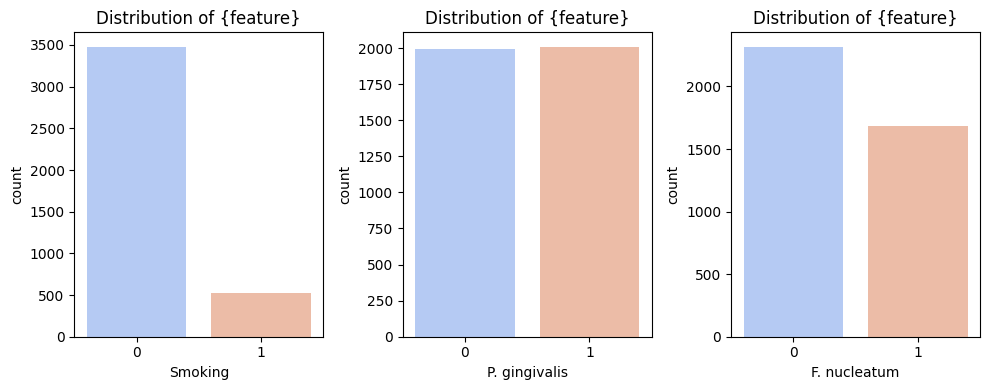

In [8]:
binary_features = ['Smoking', 'P. gingivalis', 'F. nucleatum']
for feature in binary_features:
    print(f"Feature: {feature}\n{data[feature].value_counts(normalize=True)}\n")


plt.figure(figsize=(10, 4))
for i, feature in enumerate(binary_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=data[feature], palette='coolwarm')
    plt.title('Distribution of {feature}')
plt.tight_layout()
plt.show()

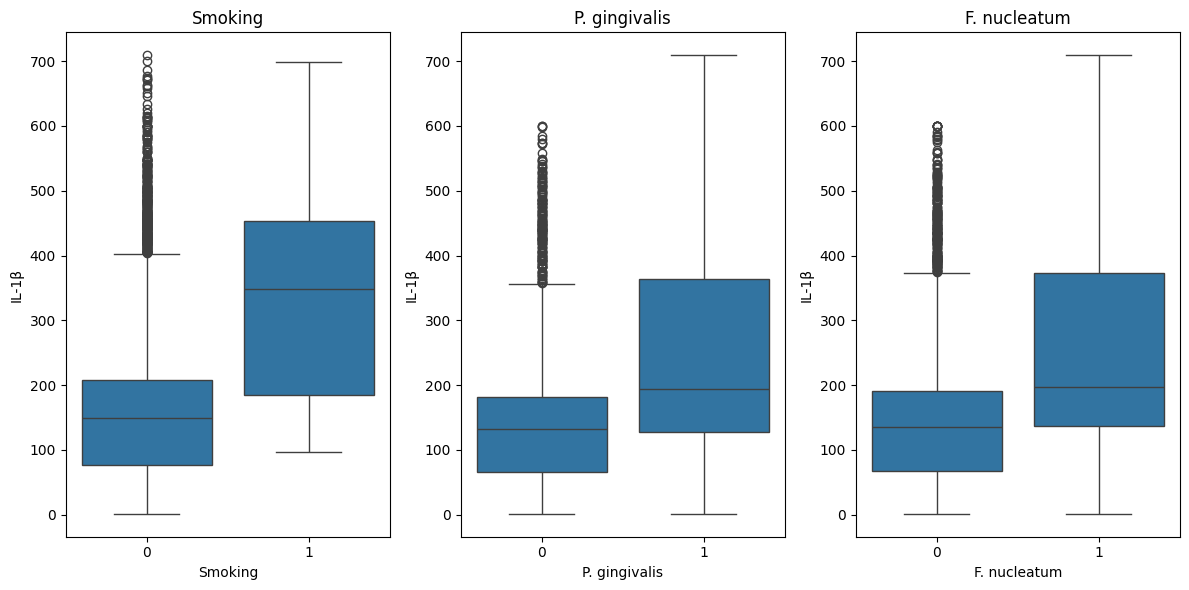

In [9]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(binary_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=data[feature], y=data['IL-1β'])
    plt.title(f'{feature}')
plt.tight_layout()
plt.show()

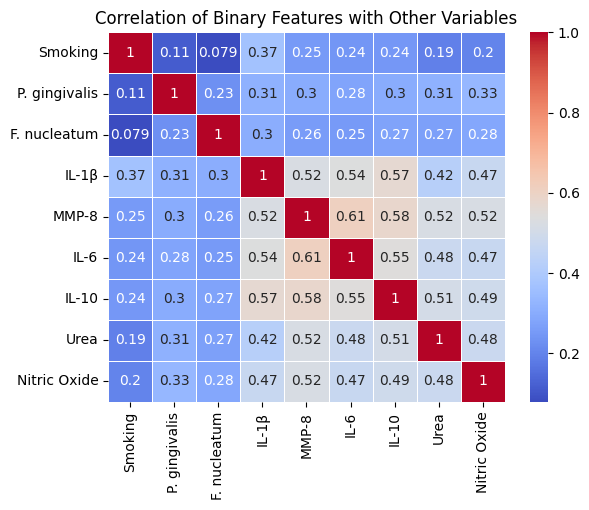

In [10]:
binary_corr = data[binary_features + ['IL-1β', 'MMP-8', 'IL-6', 'IL-10', 'Urea', 'Nitric Oxide']].corr()
sns.heatmap(binary_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation of Binary Features with Other Variables")
plt.show()

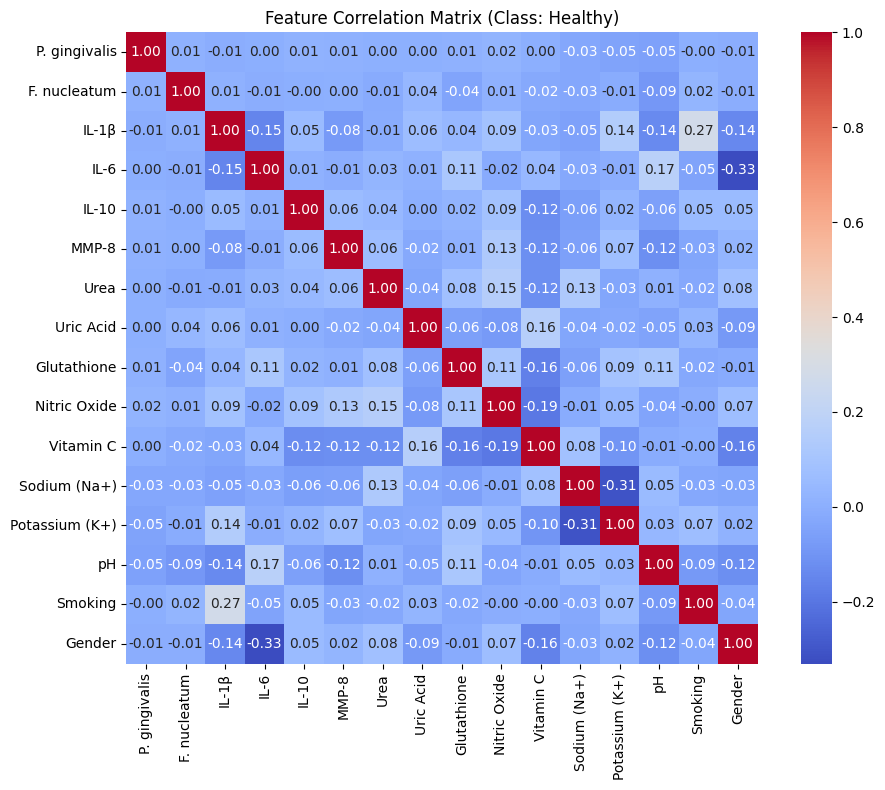

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load full dataset (before any train-test split)

# Filter to only include rows where the class is 'Healthy'
df_healthy = data[data['Category'] == 'Healthy']

# Drop the target column to get only the features
features_only = df_healthy.drop(columns='Category')

# Compute the correlation matrix
correlation_matrix = features_only.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Feature Correlation Matrix (Class: Healthy)")
plt.tight_layout()
plt.show()


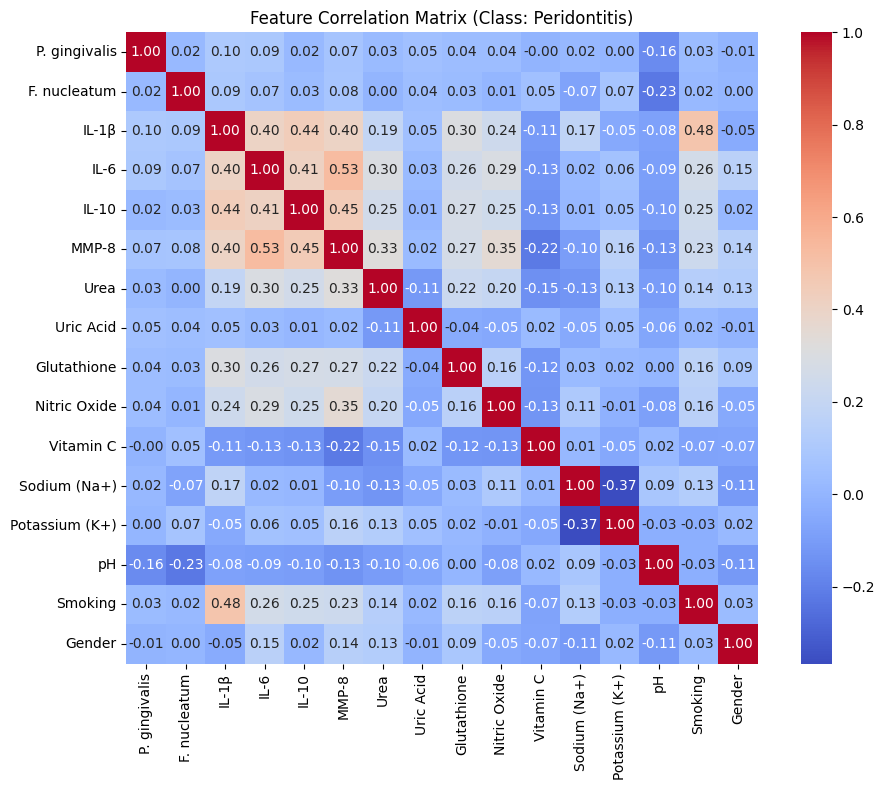

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter to only include rows where the class is 'Healthy'
df_healthy = data[data['Category'] == 'Periodontitis']

# Drop the target column to get only the features
features_only = df_healthy.drop(columns='Category')

# Compute the correlation matrix
correlation_matrix = features_only.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Feature Correlation Matrix (Class: Peridontitis)")
plt.tight_layout()
plt.show()


In [13]:
num_features = data.select_dtypes(include=[np.number])
skewness = num_features.skew()
skewed_features = skewness[skewness > 1].index
print("Skewed features to transform:", list(skewed_features))
print(data.describe())

                                            

Skewed features to transform: ['IL-1β', 'IL-6', 'IL-10', 'MMP-8', 'Urea', 'Uric Acid', 'Glutathione', 'Nitric Oxide', 'Vitamin C', 'pH', 'Smoking']
       P. gingivalis  F. nucleatum        IL-1β         IL-6        IL-10  \
count    4000.000000   4000.000000  4000.000000  4000.000000  4000.000000   
mean        0.502250      0.420750   193.989047     4.861120     7.676699   
std         0.500057      0.493741   146.677487     4.682610     4.687998   
min         0.000000      0.000000     1.528477     0.310940     2.095063   
25%         0.000000      0.000000    88.536575     2.006857     4.506507   
50%         1.000000      0.000000   157.991027     3.188466     5.923070   
75%         1.000000      1.000000   240.502593     4.977737     9.454541   
max         1.000000      1.000000   709.105492    22.325700    28.039018   

             MMP-8         Urea    Uric Acid  Glutathione  Nitric Oxide  \
count  4000.000000  4000.000000  4000.000000  4000.000000   4000.000000   
mean    

In [14]:
num_features = data.select_dtypes(include=[np.number]).columns
binary_features = binary_features = ['Smoking', 'P. gingivalis', 'F. nucleatum']
num_features = [feature for feature in num_features if feature not in binary_features]
category_min_max = data.groupby('Category')[num_features].agg(['min', 'max'])
print(category_min_max)

                  IL-1β                 IL-6                IL-10             \
                    min         max      min        max       min        max   
Category                                                                       
Elevated       1.528477  672.333217  0.31094  18.928757  2.095063  26.362161   
Healthy        1.528477  271.346943  0.31094   6.828860  2.095063  11.732091   
Periodontitis  1.528477  709.105492  0.31094  22.325700  2.095063  28.039018   

                  MMP-8                  Urea             ... Vitamin C  \
                    min         max       min        max  ...       min   
Category                                                  ...             
Elevated       0.597605  284.315559  1.143762  12.071636  ...  6.110336   
Healthy        0.597605  157.678566  1.019436   9.596004  ...  4.581223   
Periodontitis  0.597605  298.590338  1.134883  14.838154  ...  4.581223   

                         Sodium (Na+)             Potassium (K+)    

In [15]:

from scipy.stats import skew
continuous_features = [col for col in num_features if col not in binary_features]
skewness = data[continuous_features].apply(skew)
skewed_features = skewness[abs(skewness) > 1].index  

print("Skewed features that need log transformation:", skewed_features)


Skewed features that need log transformation: Index(['IL-1β', 'IL-6', 'IL-10', 'MMP-8', 'Urea', 'Uric Acid', 'Glutathione',
       'Nitric Oxide', 'Vitamin C', 'pH'],
      dtype='object')


In [16]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

data[skewed_features] = np.log1p(data[skewed_features])
print(data.isnull().sum())


Category          0
P. gingivalis     0
F. nucleatum      0
IL-1β             0
IL-6              0
IL-10             0
MMP-8             0
Urea              0
Uric Acid         0
Glutathione       0
Nitric Oxide      0
Vitamin C         0
Sodium (Na+)      0
Potassium (K+)    0
pH                0
Smoking           0
Gender            0
dtype: int64


In [17]:

cols_to_standarize = data.select_dtypes(include=['float64']).columns.difference(['IL-1β', 'MMP-8', 'IL-10'])
scaler = StandardScaler()
data[num_features] = scaler.fit_transform(data[num_features])
print(data.describe())


       P. gingivalis  F. nucleatum         IL-1β          IL-6         IL-10  \
count    4000.000000   4000.000000  4.000000e+03  4.000000e+03  4.000000e+03   
mean        0.502250      0.420750 -1.776357e-18 -9.947598e-17  5.506706e-16   
std         0.500057      0.493741  1.000125e+00  1.000125e+00  1.000125e+00   
min         0.000000      0.000000 -3.798096e+00 -1.844286e+00 -1.957016e+00   
25%         0.000000      0.000000 -3.872068e-01 -6.187188e-01 -7.218997e-01   
50%         1.000000      0.000000  1.618591e-01 -1.294088e-01 -2.311120e-01   
75%         1.000000      1.000000  5.615927e-01  3.957294e-01  6.525307e-01   
max         1.000000      1.000000  1.592915e+00  2.405759e+00  2.842692e+00   

              MMP-8          Urea     Uric Acid   Glutathione  Nitric Oxide  \
count  4.000000e+03  4.000000e+03  4.000000e+03  4.000000e+03  4.000000e+03   
mean  -6.661338e-17 -1.856293e-16 -7.034373e-16  1.421085e-16  6.386003e-16   
std    1.000125e+00  1.000125e+00  1.00012

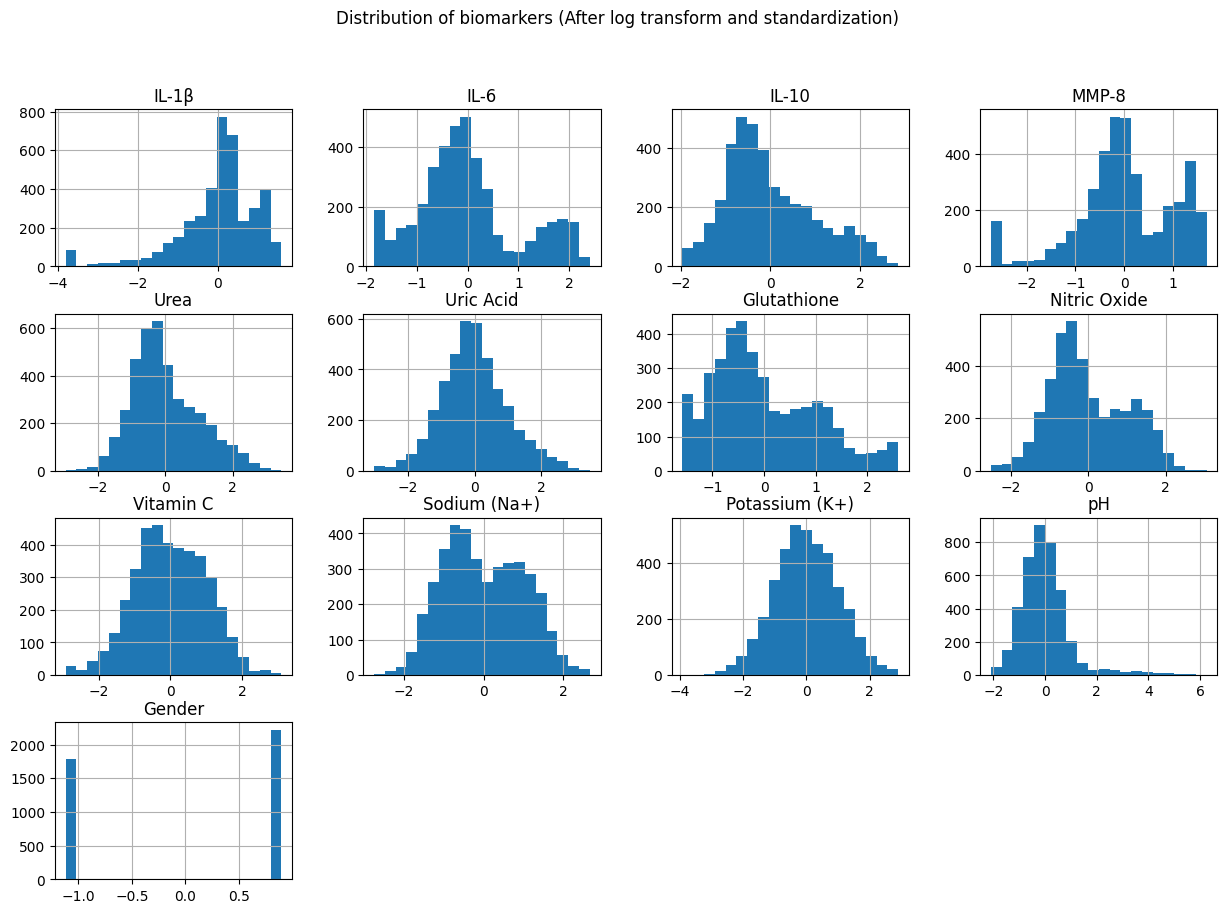

Category          0
P. gingivalis     0
F. nucleatum      0
IL-1β             0
IL-6              0
IL-10             0
MMP-8             0
Urea              0
Uric Acid         0
Glutathione       0
Nitric Oxide      0
Vitamin C         0
Sodium (Na+)      0
Potassium (K+)    0
pH                0
Smoking           0
Gender            0
dtype: int64


In [19]:
cols = data.select_dtypes(include=['float64']).columns
data[cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of biomarkers (After log transform and standardization)")
plt.show()
print(data.isnull().sum())

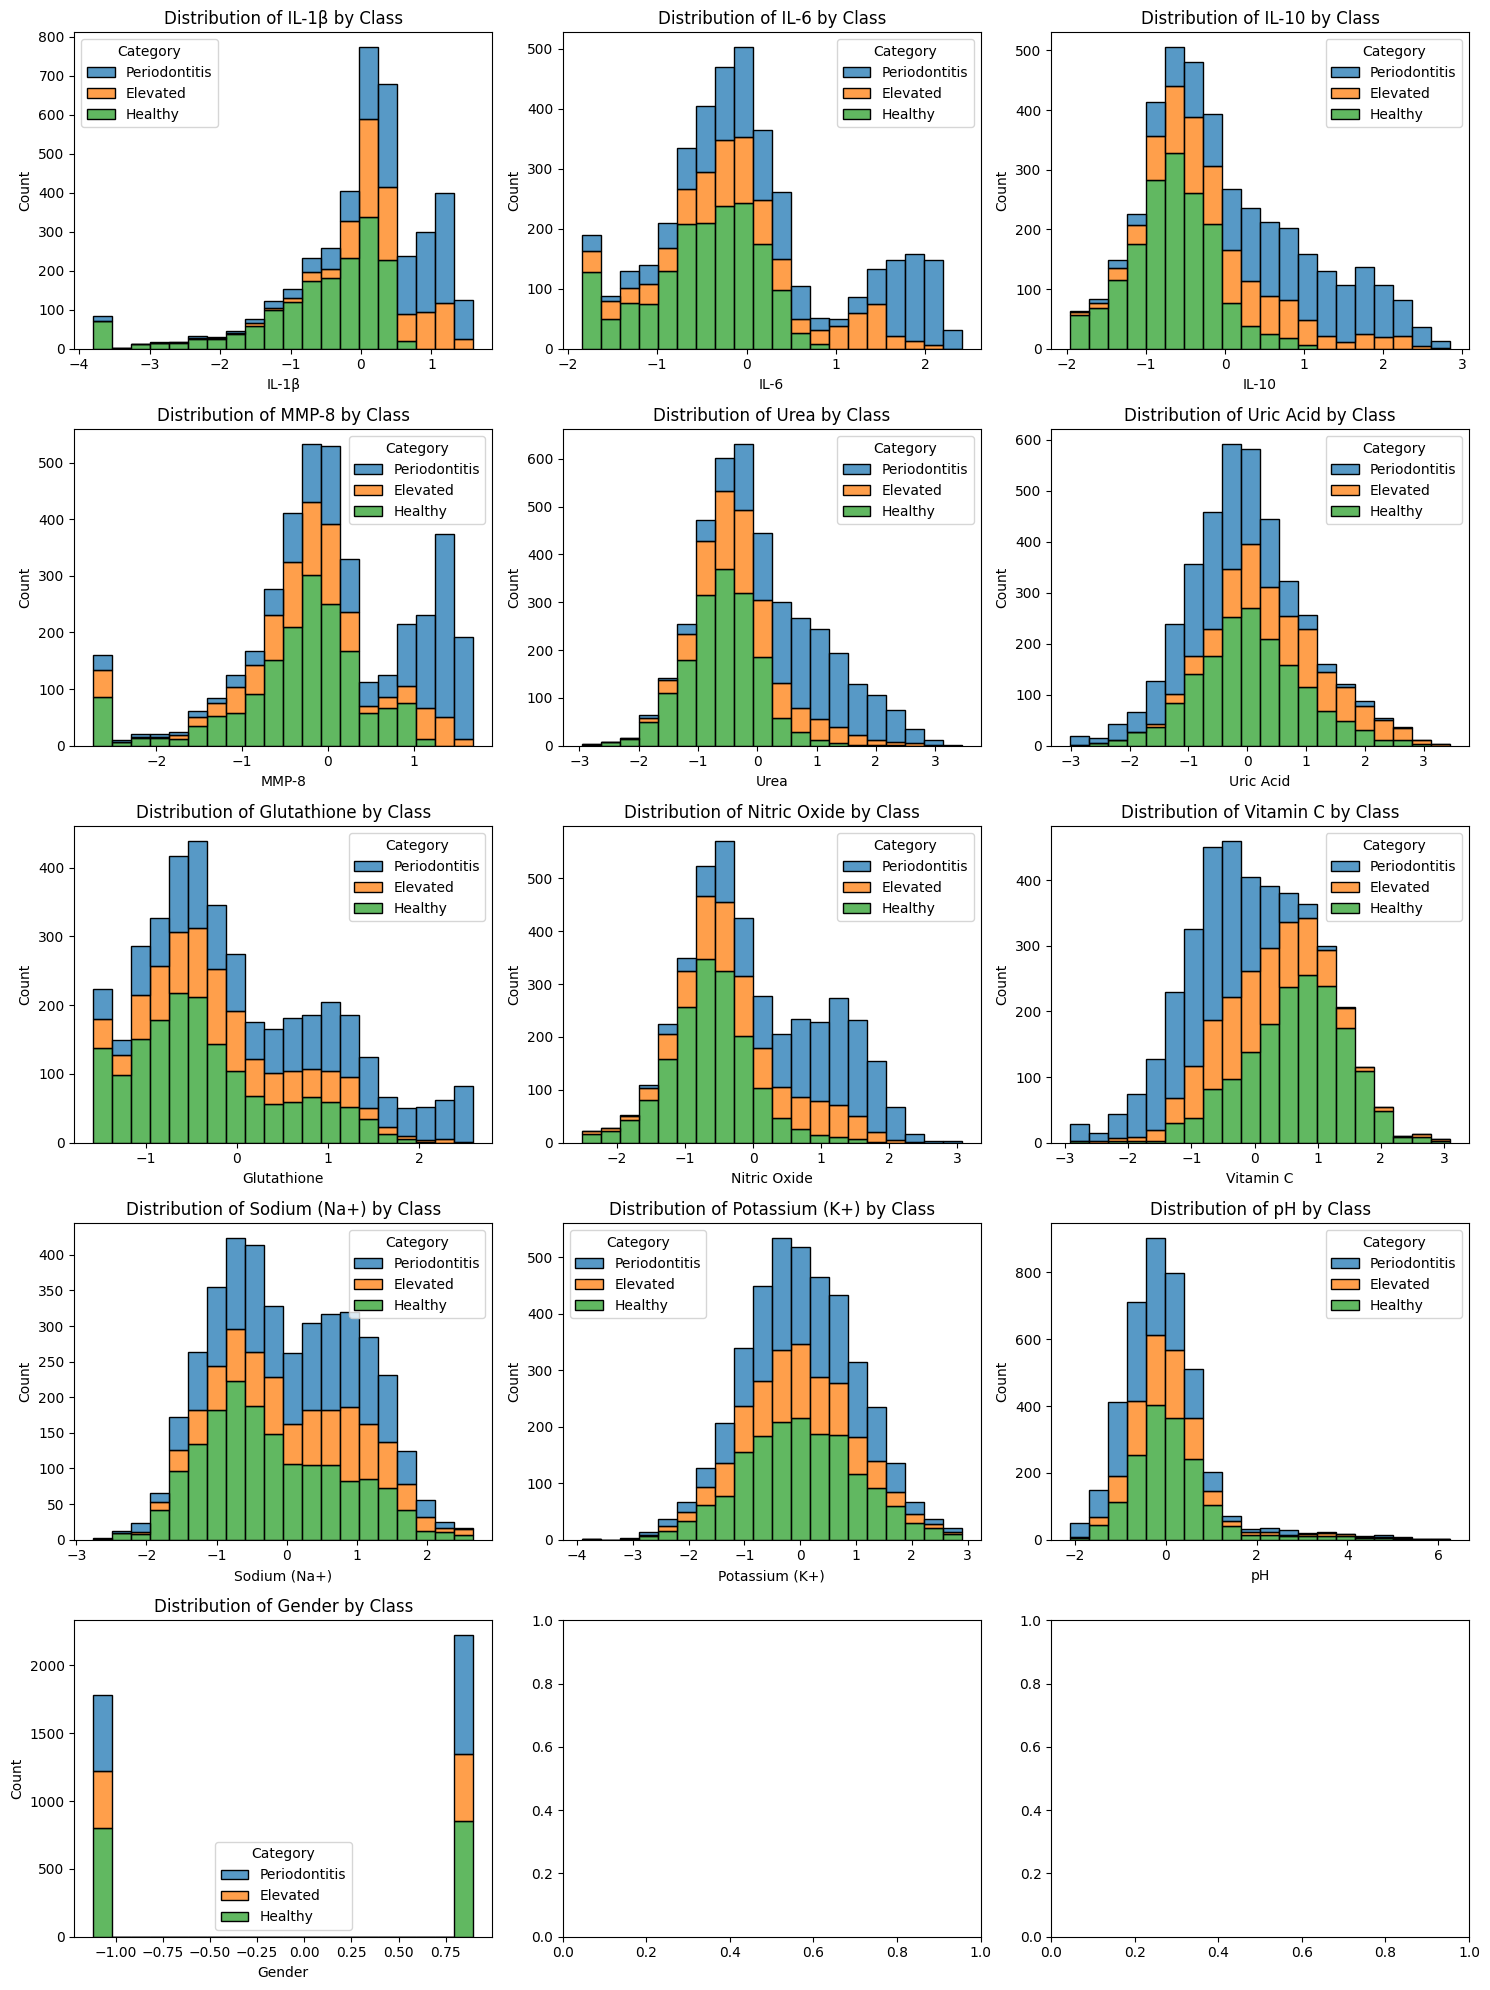

In [20]:
# Select only numerical features
cols = data.select_dtypes(include=['float64']).columns

# Set up the figure
fig, axes = plt.subplots(nrows=len(cols)//3+1, ncols=3, figsize=(15, 20))
axes = axes.flatten()

# Loop through each feature and plot
for i, col in enumerate(cols):
    sns.histplot(data, x=col, hue='Category', multiple="stack", bins=20, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} by Class")

plt.tight_layout()
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define selected features FIRST
selected_features = [
    "P. gingivalis", "F. nucleatum", "IL-1β", "IL-6", "IL-10", "MMP-8", "Urea", "Uric Acid", "Glutathione", "Nitric Oxide", "Vitamin C",
    "Smoking", "Gender"
    
]

X = data[selected_features]
y = data['Category']

# Now split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
# Combine X and y before saving
train_df = X_train.copy()
train_df["Category"] = y_train
test_df = X_test.copy()
test_df["Category"] = y_test

# Save to CSV for diagnostic tools
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (2800, 13)
Test set size: (1200, 13)


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)


In [23]:
from imblearn.over_sampling import SMOTE

# Check class distribution
print("Original class distribution:")
print(y_train.value_counts())

# Balance classes
target_count = max(
    y_train.value_counts()["Healthy"], y_train.value_counts()["Periodontitis"]
)
sampling_strategy = {
    "Healthy": target_count,
    "Periodontitis": target_count,
    "Elevated": y_train.value_counts()["Elevated"]  # Keep as is
}

smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("\nResampled class distribution:")
print(y_train.value_counts())


Original class distribution:
Category
Healthy          1161
Periodontitis    1002
Elevated          637
Name: count, dtype: int64

Resampled class distribution:
Category
Healthy          1161
Periodontitis    1161
Elevated          637
Name: count, dtype: int64


In [26]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

# 1. Mutual Information (MI) Feature Selection
mi_scores = mutual_info_classif(X_train, y_train)  
mi_df = pd.DataFrame({'Feature': X_train.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by="MI Score", ascending=False)

# Print top features based on MI
print("Top Features by Mutual Information:")
print(mi_df.head(20))

# 2. Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
rf_df = pd.DataFrame({'Feature': X_train.columns, 'RF Score': importances})
rf_df = rf_df.sort_values(by="RF Score", ascending=False)

# Print top features based on RF
print("\nTop Features by Random Forest Importance:")
print(rf_df.head(20))


Top Features by Mutual Information:
          Feature  MI Score
4           IL-10  0.261175
6            Urea  0.234517
10      Vitamin C  0.234205
9    Nitric Oxide  0.231654
2           IL-1β  0.220751
3            IL-6  0.184560
5           MMP-8  0.179899
0   P. gingivalis  0.141562
7       Uric Acid  0.106165
1    F. nucleatum  0.101680
8     Glutathione  0.079066
11        Smoking  0.042265
12         Gender  0.000000

Top Features by Random Forest Importance:
          Feature  RF Score
4           IL-10  0.148265
6            Urea  0.136128
10      Vitamin C  0.126653
9    Nitric Oxide  0.112364
2           IL-1β  0.100058
7       Uric Acid  0.099236
5           MMP-8  0.067935
3            IL-6  0.058088
8     Glutathione  0.048718
1    F. nucleatum  0.043100
0   P. gingivalis  0.040055
11        Smoking  0.012022
12         Gender  0.007378


Accuracy: 0.7200


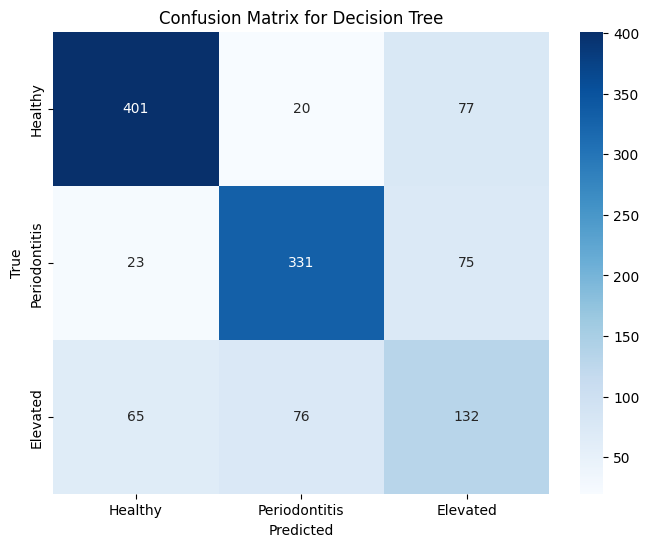

Classification Report:
               precision    recall  f1-score   support

     Elevated       0.46      0.48      0.47       273
      Healthy       0.82      0.81      0.81       498
Periodontitis       0.78      0.77      0.77       429

     accuracy                           0.72      1200
    macro avg       0.69      0.69      0.69      1200
 weighted avg       0.72      0.72      0.72      1200



In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

class_names = ['Healthy', 'Periodontitis', 'Elevated']
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Define the class names in correct order
class_names = ['Healthy', 'Periodontitis', 'Elevated']
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt, labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Accuracy: 0.8258333333333333
Training class distribution:
Category
Healthy          1161
Periodontitis    1161
Elevated          637
Name: count, dtype: int64
Test class distribution:
Category
Healthy          498
Periodontitis    429
Elevated         273
Name: count, dtype: int64
Unique values in y_train: ['Healthy' 'Elevated' 'Periodontitis']
Unique values in y_test: ['Periodontitis' 'Healthy' 'Elevated']
Accuracy: 0.8258


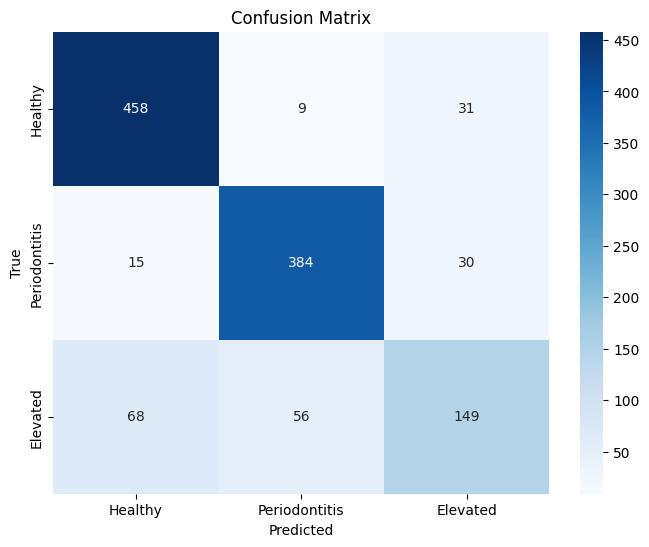

               precision    recall  f1-score   support

     Elevated       0.71      0.55      0.62       273
      Healthy       0.85      0.92      0.88       498
Periodontitis       0.86      0.90      0.87       429

     accuracy                           0.83      1200
    macro avg       0.80      0.79      0.79      1200
 weighted avg       0.82      0.83      0.82      1200



In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train your model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Print accuracy and distributions
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Training class distribution:")
print(y_train.value_counts())

print("Test class distribution:")
print(y_test.value_counts())

print("Unique values in y_train:", y_train.unique())
print("Unique values in y_test:", y_test.unique())

# Define the class names in correct order
class_names = ['Healthy', 'Periodontitis', 'Elevated']


accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy:.4f}')
# Ensure the labels are aligned for confusion matrix calculation
cm = confusion_matrix(y_test, y_pred_rf, labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_rf))

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy', 'log_loss']
    
}

grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Best Score: {grid_search_rf.best_score_:.2f}")

Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.84


Accuracy: 0.82


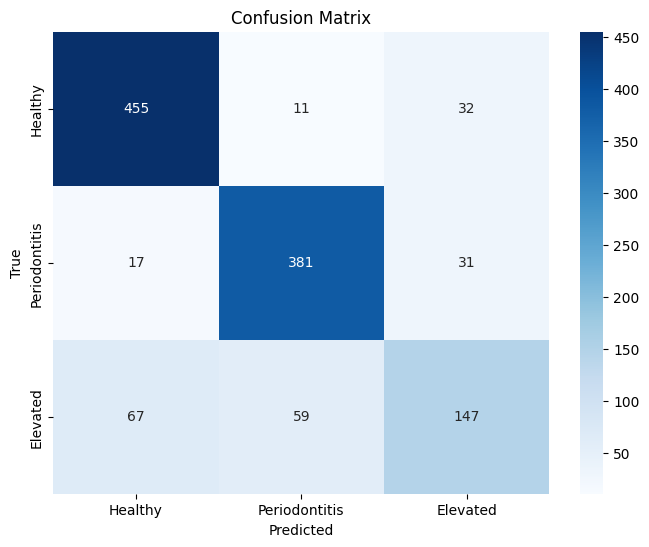

               precision    recall  f1-score   support

     Elevated       0.70      0.54      0.61       273
      Healthy       0.84      0.91      0.88       498
Periodontitis       0.84      0.89      0.87       429

     accuracy                           0.82      1200
    macro avg       0.80      0.78      0.78      1200
 weighted avg       0.81      0.82      0.81      1200



In [30]:
best_params_rf = grid_search_rf.best_params_
rf_model = RandomForestClassifier(**best_params_rf, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy:.2f}')
cm = confusion_matrix(y_test, y_pred_rf, labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_rf))

In [31]:
# Get the best hyperparameters from the grid search
best_params_rf= grid_search_rf.best_params_

# Train the model using the best parameters found from grid search
rf_model = RandomForestClassifier(**best_params_rf, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Get the accuracy of the model on the test set
test_accuracy = accuracy_score(y_test, y_pred_rf)

# Get the mean CV score (from grid search results)
cv_mean_score = grid_search_rf.best_score_

# Print the results for comparison
print(f"Cross-validation mean score (CV score): {cv_mean_score:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

# Determine the difference (severity of overfitting)
accuracy_diff = cv_mean_score - test_accuracy
print(f"Difference between CV score and test accuracy: {accuracy_diff:.4f}")

# If the difference is large, it's a sign of overfitting
if accuracy_diff > 0.05:
    print("Warning: Significant overfitting detected!")
else:
    print("Overfitting seems to be manageable.")

Cross-validation mean score (CV score): 0.8361
Test accuracy: 0.8192
Difference between CV score and test accuracy: 0.0169
Overfitting seems to be manageable.


In [32]:
import sys
!{sys.executable} -m pip install shap



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3.12 install --upgrade pip


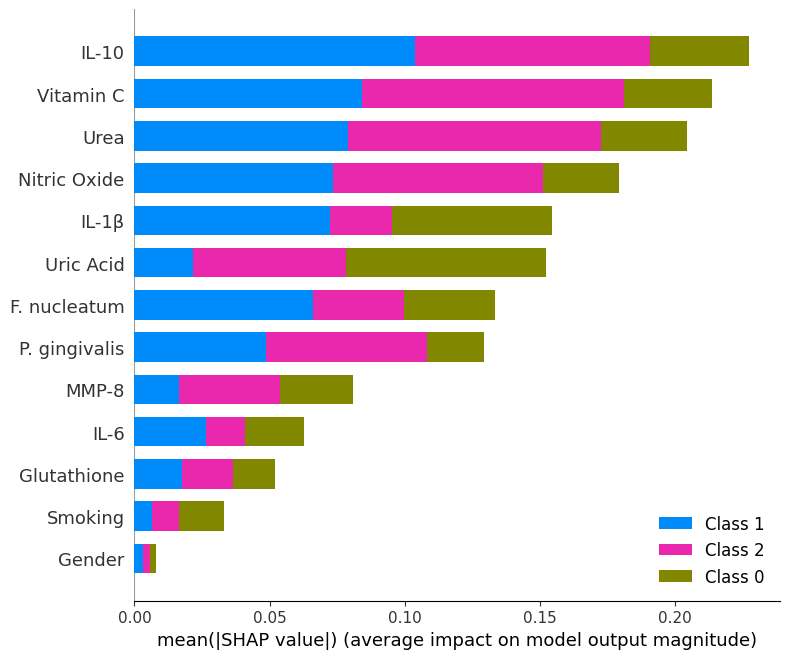

In [33]:
import shap
explainer = shap.Explainer(rf_model)  
shap_values = explainer(X_train)  
custom_class_names = {0: 'Healthy', 1: 'Elevated', 2: 'Periodontitis'}
shap.summary_plot(shap_values, X_train)



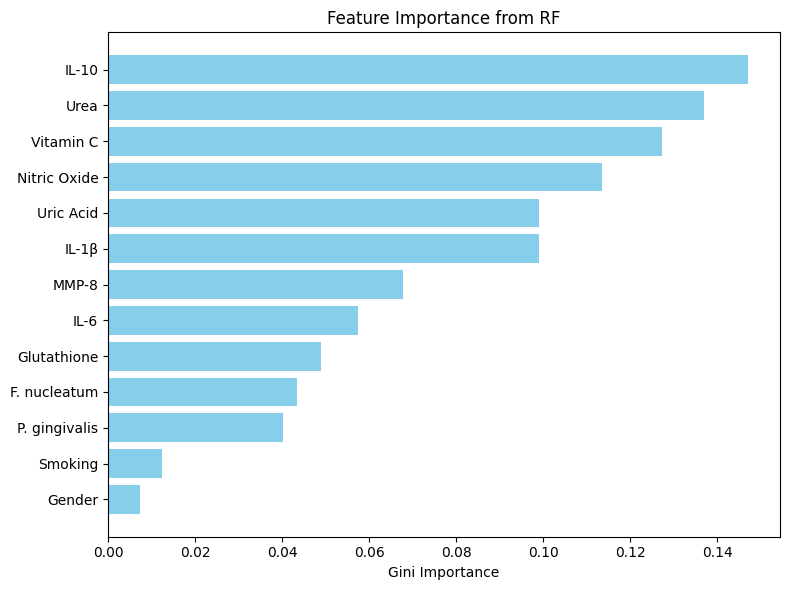

In [36]:
# If using sklearn wrapper:
rf_importance = rf_model.feature_importances_

# Create a similar dataframe
rf_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Gini Importance (RF)': rf_importance
}).sort_values(by='Gini Importance (RF)', ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Gini Importance (RF)'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance from RF')
plt.tight_layout()
plt.show()

Accuracy: 0.83


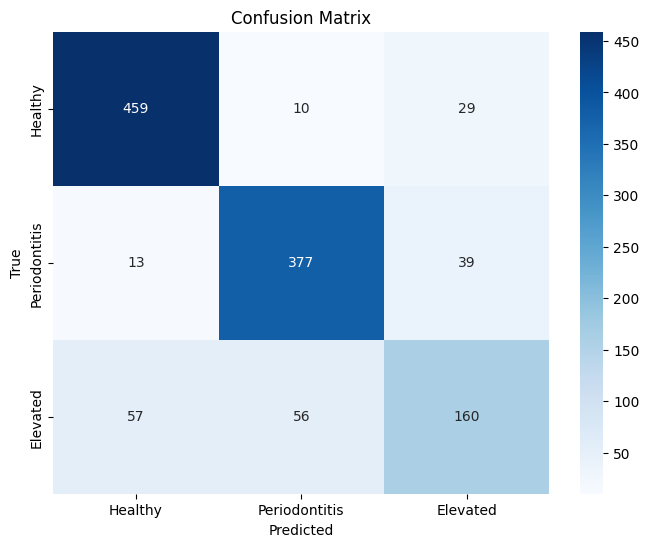

               precision    recall  f1-score   support

     Elevated       0.70      0.59      0.64       273
      Healthy       0.87      0.92      0.89       498
Periodontitis       0.85      0.88      0.86       429

     accuracy                           0.83      1200
    macro avg       0.81      0.80      0.80      1200
 weighted avg       0.82      0.83      0.83      1200



In [40]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', decision_function_shape='ovr', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy:.2f}')
cm = confusion_matrix(y_test, y_pred_svm, labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_svm))

In [42]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
   
}

grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

print("Best SVM parameters:", grid_search_svm.best_params_)
print(f"Best Score: {grid_search_svm.best_score_:.4f}")

Best SVM parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.8297


Accuracy: 0.8083


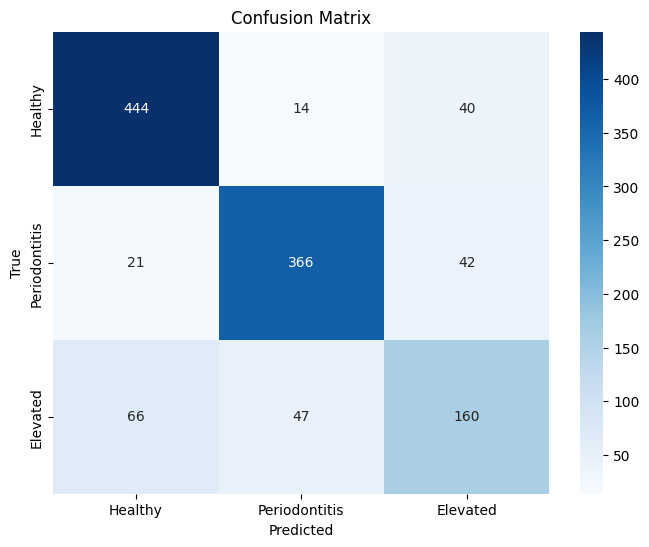

               precision    recall  f1-score   support

     Elevated       0.66      0.59      0.62       273
      Healthy       0.84      0.89      0.86       498
Periodontitis       0.86      0.85      0.86       429

     accuracy                           0.81      1200
    macro avg       0.78      0.78      0.78      1200
 weighted avg       0.80      0.81      0.81      1200



In [43]:
best_params_svm = grid_search_svm.best_params_
svm_model = SVC(**best_params_svm, probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy:.4f}')
cm = confusion_matrix(y_test, y_pred_svm, labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.7892


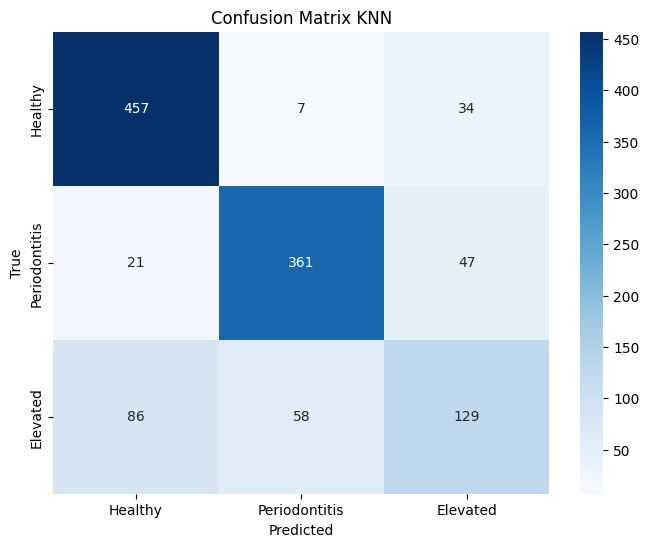

               precision    recall  f1-score   support

     Elevated       0.61      0.47      0.53       273
      Healthy       0.81      0.92      0.86       498
Periodontitis       0.85      0.84      0.84       429

     accuracy                           0.79      1200
    macro avg       0.76      0.74      0.75      1200
 weighted avg       0.78      0.79      0.78      1200



In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy:.4f}')
# Evaluate the model
cm = confusion_matrix(y_test, y_pred_knn, labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_knn))

In [45]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search_knn = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

print("Best KNN parameters:", grid_search_knn.best_params_)
print(f"Best Score: {grid_search_knn.best_score_}")

Best KNN parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Best Score: 0.8168267252023597


train acc 1.0
test acc 0.8041666666666667
Accuracy: 0.8042


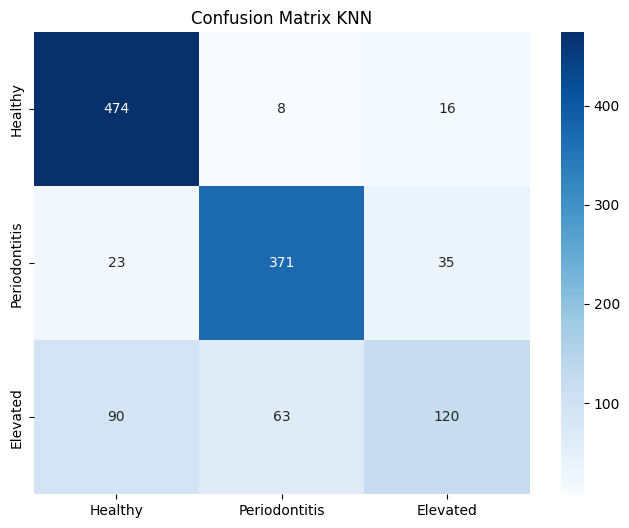

               precision    recall  f1-score   support

     Elevated       0.70      0.44      0.54       273
      Healthy       0.81      0.95      0.87       498
Periodontitis       0.84      0.86      0.85       429

     accuracy                           0.80      1200
    macro avg       0.78      0.75      0.76      1200
 weighted avg       0.79      0.80      0.79      1200



In [49]:
best_params_knn = grid_search_knn.best_params_
knn_model = KNeighborsClassifier(**best_params_knn)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print("train acc", train_acc)
print("test acc", test_acc)
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy:.4f}')
cm = confusion_matrix(y_test, y_pred_knn, labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix KNN')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_knn))

In [50]:
# Get the best hyperparameters from the grid search
best_params_knn = grid_search_knn.best_params_

# Train the model using the best parameters found from grid search
knn_model = KNeighborsClassifier(**best_params_knn)
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Get the accuracy of the model on the test set
test_accuracy = accuracy_score(y_test, y_pred_knn)

# Get the mean CV score (from grid search results)
cv_mean_score = grid_search_knn.best_score_

# Print the results for comparison
print(f"Cross-validation mean score (CV score): {cv_mean_score:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

# Determine the difference (severity of overfitting)
accuracy_diff = cv_mean_score - test_accuracy
print(f"Difference between CV score and test accuracy: {accuracy_diff:.4f}")

# If the difference is large, it's a sign of overfitting
if accuracy_diff > 0.05:
    print("Warning: Significant overfitting detected!")
else:
    print("Overfitting seems to be manageable.")

Cross-validation mean score (CV score): 0.8168
Test accuracy: 0.8042
Difference between CV score and test accuracy: 0.0127
Overfitting seems to be manageable.


Accuracy: 0.8300


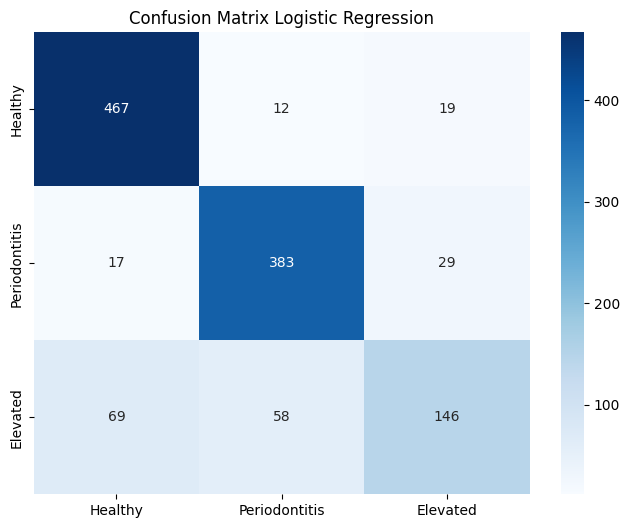

              precision    recall  f1-score   support

           0       0.75      0.53      0.63       273
           1       0.84      0.94      0.89       498
           2       0.85      0.89      0.87       429

    accuracy                           0.83      1200
   macro avg       0.81      0.79      0.79      1200
weighted avg       0.82      0.83      0.82      1200



In [51]:
from sklearn.linear_model import LogisticRegression 

# Prepare data
label_encoder_category = LabelEncoder()
y= label_encoder_category.fit_transform(data['Category'])
#X_selected = data.drop(columns=['Category'])  # Features
#rint(X_selected.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Step 2: Fit scaler ONLY on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Step 3: Apply same transformation to test data
X_test_scaled = scaler.transform(X_test)
lr_model = LogisticRegression(multi_class='ovr', solver='lbfgs', random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy:.4f}')
class_names_int = label_encoder_category.inverse_transform([1, 2, 0])

cm = confusion_matrix(y_test, y_pred_lr, labels=[1, 2, 0])


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_int, yticklabels=class_names_int)
plt.title('Confusion Matrix Logistic Regression')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_lr))

In [52]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg', 'newton-cholesky'],
    'penalty': ['l1', 'l2', 'elasticnet']
}

grid_search_lr = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train_scaled, y_train)

print("Best LR parameters:", grid_search_lr.best_params_)
print("Best LR score:", grid_search_lr.best_score_)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

Best LR parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best LR score: 0.8217857142857143


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
240 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Fr

Accuracy: 0.84


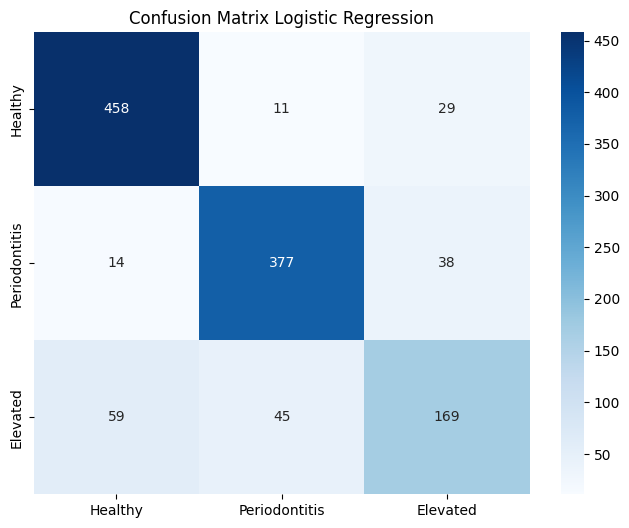

              precision    recall  f1-score   support

           0       0.72      0.62      0.66       273
           1       0.86      0.92      0.89       498
           2       0.87      0.88      0.87       429

    accuracy                           0.84      1200
   macro avg       0.82      0.81      0.81      1200
weighted avg       0.83      0.84      0.83      1200



In [53]:
best_params_lr = grid_search_lr.best_params_
lr_model = LogisticRegression(**best_params_lr, random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy:.2f}')
#class_names = label_encoder_category.inverse_transform([0, 1, 2])

cm = confusion_matrix(y_test, y_pred_lr, labels=[1, 2, 0])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_int, yticklabels=class_names_int)
plt.title('Confusion Matrix Logistic Regression')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_lr))

[2 0 0 ... 1 1 1]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:14:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_lable_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8250


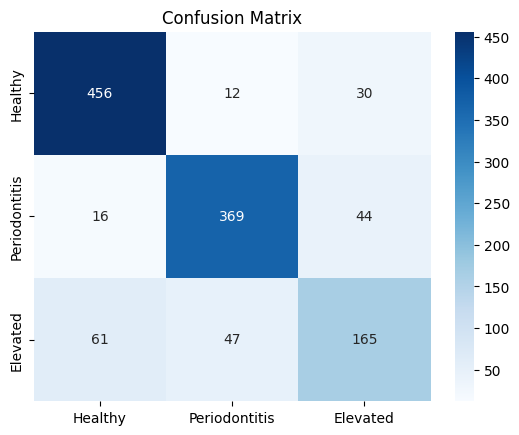

              precision    recall  f1-score   support

           0       0.69      0.60      0.64       273
           1       0.86      0.92      0.88       498
           2       0.86      0.86      0.86       429

    accuracy                           0.82      1200
   macro avg       0.80      0.79      0.80      1200
weighted avg       0.82      0.82      0.82      1200



In [54]:
import xgboost as xgb

label_encoder_category = LabelEncoder()
y= label_encoder_category.fit_transform(data['Category'])
print(y)
#X_selected = data.drop(columns=['Category'])  # Features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 2: Fit scaler ONLY on training data
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)

# Step 3: Apply same transformation to test data
#X_test_scaled = scaler.transform(X_test)
xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='logloss',
    use_lable_encoder=False,
    random_state=42
)

xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
class_names_int = label_encoder_category.inverse_transform([1, 2, 0])
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy:.4f}')


#class_names_int = label_encoder_category.inverse_transform([0, 1, 2])
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb, labels=[1, 2, 0])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_int, yticklabels=class_names_int)
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_xgb))

In [55]:
from skopt.searchcv import BayesSearchCV


param_space = {
    'n_estimators': (50, 500),
    'learning_rate': (0.01, 0.2),
    'max_depth': (1, 3, 10, 15)
}

bayes_search = BayesSearchCV(xgb_clf, param_space, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1)
bayes_search.fit(X_train, y_train)

print("Best XGBoost parameters:", bayes_search.best_params_)
print("Best XGBoost score:", bayes_search.best_score_)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:14:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_lable_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:14:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_lable_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:14:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_lable_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:14:21] WARN

Best XGBoost parameters: OrderedDict({'learning_rate': 0.16434993098492695, 'max_depth': 3, 'n_estimators': 79})
Best XGBoost score: 0.8360714285714286


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:14:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_lable_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8292


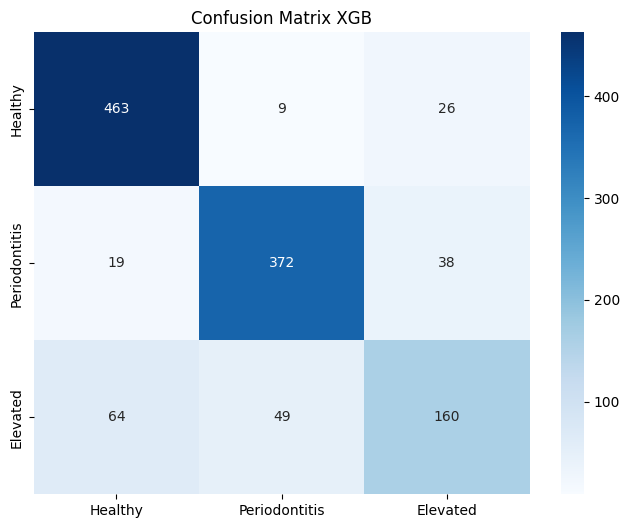

              precision    recall  f1-score   support

           0       0.71      0.59      0.64       273
           1       0.85      0.93      0.89       498
           2       0.87      0.87      0.87       429

    accuracy                           0.83      1200
   macro avg       0.81      0.79      0.80      1200
weighted avg       0.82      0.83      0.82      1200



In [56]:
best_params_xgb = bayes_search.best_params_
xgb_clf = xgb.XGBClassifier(
    **best_params_xgb,
    objective='multi:softmax',
    num_class=3,
    eval_metric='logloss',
    use_lable_encoder=False,
    random_state=42
)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy:.4f}')


#class_names = label_encoder_category.inverse_transform([0, 1, 2])
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_xgb, labels=[1, 2, 0])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_int, yticklabels=class_names_int)
plt.title('Confusion Matrix XGB')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_xgb))


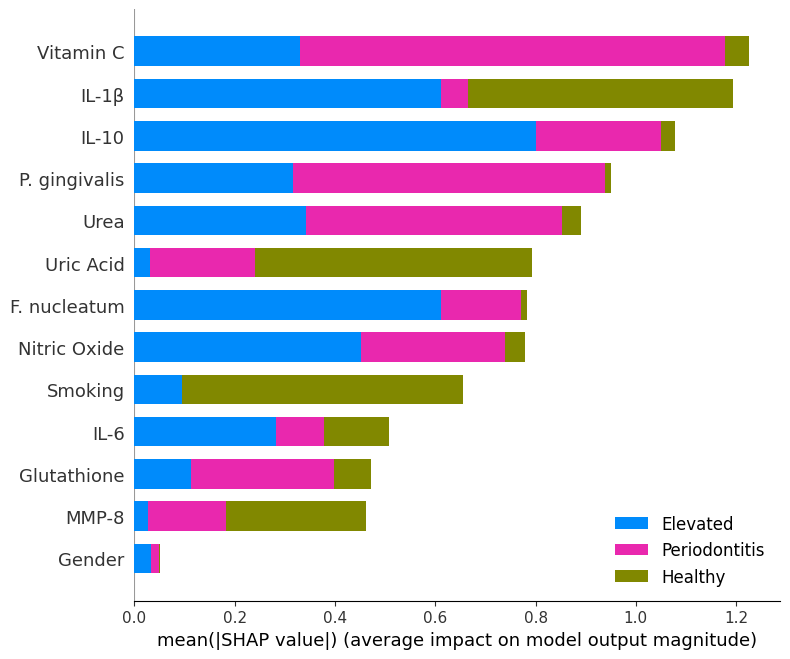

In [57]:
import shap
explainer = shap.Explainer(xgb_clf)  # or shap.TreeExplainer(model)
shap_values = explainer(X_train)   # Use the training data
custom_class_names = ['Healthy', 'Elevated', 'Periodontitis']
shap.summary_plot(shap_values, X_train, class_names=custom_class_names)

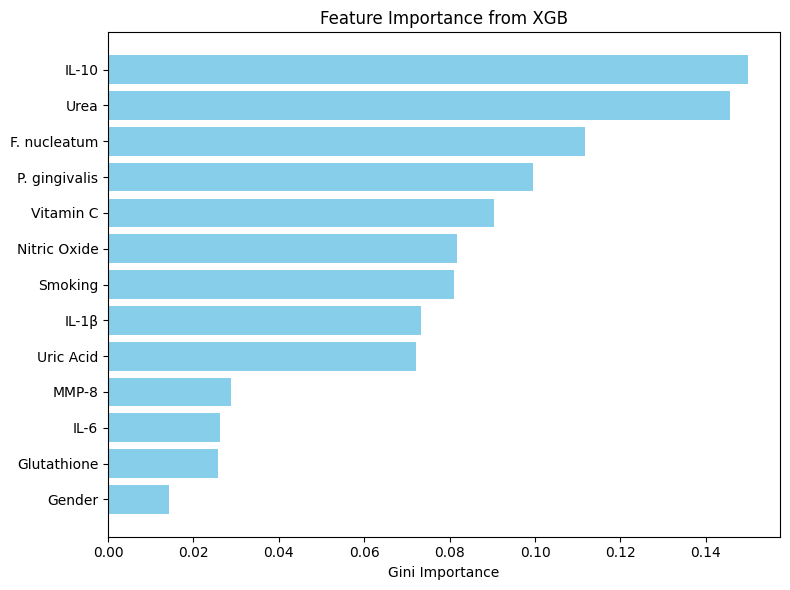

In [58]:
# If using sklearn wrapper:
xgb_importance = xgb_clf.feature_importances_

# Create a similar dataframe
xgb_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Gini Importance (XGB)': xgb_importance
}).sort_values(by='Gini Importance (XGB)', ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(xgb_importance_df['Feature'], xgb_importance_df['Gini Importance (XGB)'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance from XGB')
plt.tight_layout()
plt.show()

In [135]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

dnn_model = Sequential()
dnn_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
# Hidden Layers
dnn_model.add(Dense(128, activation='relu'))
dnn_model.add(Dropout(0.5))  # Optional Dropout layer to prevent overfitting
dnn_model.add(Dense(64, activation='relu'))

# Output Layer (Sigmoid for binary classification)
dnn_model.add(Dense(3, activation='softmax'))

# Compile the model
dnn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = dnn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
test_loss, test_acc = dnn_model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_acc}")




Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6618 - loss: 0.7698 - val_accuracy: 0.8208 - val_loss: 0.4310
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.8150 - loss: 0.4549 - val_accuracy: 0.8367 - val_loss: 0.4080
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.8123 - loss: 0.4380 - val_accuracy: 0.8250 - val_loss: 0.4145
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.8292 - loss: 0.4187 - val_accuracy: 0.8350 - val_loss: 0.4041
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.8289 - loss: 0.4078 - val_accuracy: 0.8308 - val_loss: 0.4085
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.8368 - loss: 0.3900 - val_accuracy: 0.8292 - val_loss: 0.4171
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.8365 - loss: 0.3890 - val_accuracy: 0.8242 - val_loss: 0.4141
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.8376 - loss: 0.3831 - val_accuracy: 0.8342 -

In [136]:
import keras_tuner as kt

def build_model(hp):
    dnn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(hp.Int('units', 32, 128, step=32), activation='relu'),
        tf.keras.layers.Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    dnn_model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return dnn_model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2
)

tuner.search(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Reloading Tuner from ./untitled_project/tuner0.json


Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5693 - loss: 0.8935 - val_accuracy: 0.7975 - val_loss: 0.4944
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.7951 - loss: 0.4952 - val_accuracy: 0.8258 - val_loss: 0.4295
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.8209 - loss: 0.4431 - val_accuracy: 0.8275 - val_loss: 0.4145
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.8261 - loss: 0.4252 - val_accuracy: 0.8300 - val_loss: 0.4076
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.8264 - loss: 0.4234 - val_accuracy: 0.8333 - val_loss: 0.4052
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.8232 - loss: 0.4251 - val_accuracy: 0.8317 - val_loss: 0.4041
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.8425 - loss: 0.3834 - val_accuracy: 0.8317 - val_loss: 0.4029
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.8314 - loss: 0.4124 - val_accura

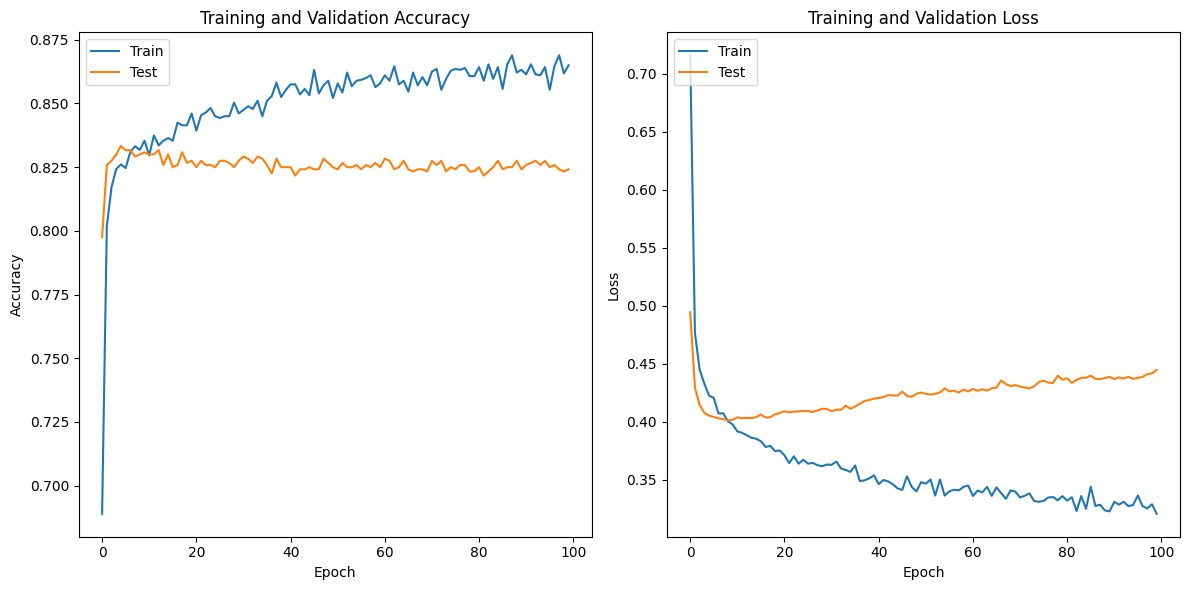

In [137]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import numpy as np

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters()[0]

# Build the best model using the found hyperparameters
best_model = build_model(best_hp)

# Train the model with the best hyperparameters
history = best_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

# Predict the classes for test set
y_pred_dnn = np.argmax(best_model.predict(X_test_scaled), axis=1)  # Get the predicted class labels (not probabilities)

# Evaluate the model
test_loss, test_acc = best_model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_acc}")

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred_dnn, average='macro')
recall = recall_score(y_test, y_pred_dnn, average='macro')
f1 = f1_score(y_test, y_pred_dnn, average='macro')
# Get the best hyperparameters from the tuner
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
for param in best_hp.values:
    print(f"{param}: {best_hp.get(param)}")
# Print classification report
print(f"Classification Report for DNN:\n")
print(classification_report(y_test, y_pred_dnn))

# Print the individual scores (precision, recall, f1)
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1-Score (Macro): {f1:.4f}")

# Plotting training and validation accuracy over epochs
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


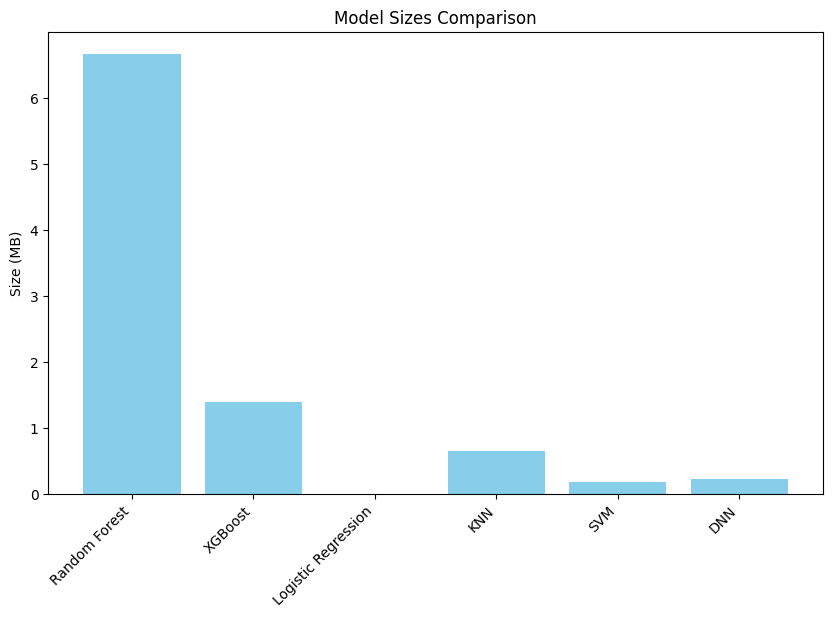

In [139]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# List your model files
model_files = {
    "Random Forest": "rf_model.pkl",
    "XGBoost": "xgb_model.pkl",
    "Logistic Regression": "lr_model.pkl",
    "KNN": "knn_model.pkl",
    "SVM": "svm_model.pkl",
    "DNN": "dnn_model.keras"
}

# Get sizes of each model
model_sizes = {name: os.path.getsize(path) / (1024 * 1024)  # Size in MB
               for name, path in model_files.items()}

# Convert to DataFrame for easy plotting
size_df = pd.DataFrame(list(model_sizes.items()), columns=["Model", "Size (MB)"])

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(size_df["Model"], size_df["Size (MB)"], color='skyblue')
plt.ylabel('Size (MB)')
plt.title('Model Sizes Comparison')
plt.xticks(rotation=45, ha='right')  # Rotate model names for better visibility
plt.show()


In [59]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, log_loss
import numpy as np
import pandas as pd


models = {
    'Random Forest': rf_model,
    'SVM': svm_model,
    'LR': lr_model,
    'KNN': knn_model,
    'XGBoost': xgb_clf,
    'DNN': best_model  # DNN included here
}

# Define metrics to compare models
metrics = {
    "Accuracy": accuracy_score,
    "Balanced Accuracy": balanced_accuracy_score,
    "Macro F1-Score": lambda y_true, y_pred: f1_score(y_true, y_pred, average='macro'),
    "Weighted F1-Score": lambda y_true, y_pred: f1_score(y_true, y_pred, average='weighted'),
    "Macro Precision": lambda y_true, y_pred: precision_score(y_true, y_pred, average='macro'),
    "Macro Recall": lambda y_true, y_pred: recall_score(y_true, y_pred, average='macro'),
}

results = {}

# Iterate through each model to compute metrics
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    if model_name == 'DNN':  # Special handling for DNN
        # DNN model gives probabilities, so we need to get the class labels
        y_pred = np.argmax(model.predict(X_test), axis=1)  # Convert probabilities to class labels
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Store results for all metrics
    results[model_name] = {metric_name: metric_func(y_test, y_pred) for metric_name, metric_func in metrics.items()}

    # If the model supports probability outputs, compute log loss
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)
        results[model_name]["Log Loss"] = log_loss(y_test, y_probs)

# Convert results into a DataFrame for easy comparison
df_results = pd.DataFrame(results).T
print(df_results)


NameError: name 'best_model' is not defined

In [145]:
for name, model in models.items():
    if name == 'DNN':  # Special handling for DNN
        # For DNN, use np.argmax to get class labels from probabilities
        y_train_pred = np.argmax(model.predict(X_train), axis=1)
        y_test_pred = np.argmax(model.predict(X_test), axis=1)
    else:
        # For other models, directly use the predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

    # Calculate accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    print(f"{name} - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")


Random Forest - Train Accuracy: 1.0000, Test Accuracy: 0.8283
SVM - Train Accuracy: 0.8343, Test Accuracy: 0.8325
LR - Train Accuracy: 0.8275, Test Accuracy: 0.8292
KNN - Train Accuracy: 1.0000, Test Accuracy: 0.8017
XGBoost - Train Accuracy: 0.9354, Test Accuracy: 0.8333
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
DNN - Train Accuracy: 0.2839, Test Accuracy: 0.2875
